**Installing the required libraries to avoid dependecy issues**

In [ ]:
!pip uninstall tensorflow tensorflow-gpu keras tensorflow-addons
!pip install tensorflow keras \
  scikit-learn imbalanced-learn \
  tensorflow-addons

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.11/dist-packages/tensorflow-2.18.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tensorflow/*
Proceed (Y/n)? y
y
y
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/keras-3.8.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/keras/*
Proceed (Y/n)?   Successfully uninstalled keras-3.8.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 k

**Mapping the TPU confugations**

In [ ]:
import tensorflow as tf

# Detect hardware
try:
    # Try to detect TPU first
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU:", tpu.master())
except ValueError:
    # Fall back to GPU if available
    if tf.config.list_physical_devices('GPU'):
        strategy = tf.distribute.MirroredStrategy()
        print("Running on GPU")
    else:
        # Default to CPU
        strategy = tf.distribute.get_strategy()
        print("Running on CPU")

print("REPLICAS:", strategy.num_replicas_in_sync)

Running on GPU
REPLICAS: 1


**Installing NLP Libraries**

In [ ]:
#!pip install tensorflow-addons==0.21.0  # For TF 2.12
!pip install jieba==0.42.1
!pip install nltk
!pip install wordcloud
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 67.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0

**Importing the required libraries**

In [ ]:
import tensorflow as tf
import os
import jieba
import numpy as np
tf.keras.optimizers.Adam
#import tensorflow_addons as tfa # Built-in GELU in TF
#from tensorflow_addons.optimizers import Adam
import pandas as pd

from tensorflow.keras.layers import Dense, Input,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import copy
import random
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
from string import digits, punctuation
import re
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from transformers import AutoModel
import matplotlib.pyplot as plt
import transformers
from transformers import BertTokenizer,BertModel,BertConfig,BertForPreTraining
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score
from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
import pandas as pd
#from gensim.models.word2vec import Word2VecKeyedVectors
try:
    from gensim.models import KeyedVectors  # New versions (Gensim 4.0+)
except ImportError:
    from gensim.models.word2vec import Word2VecKeyedVectors  # Old versions
    KeyedVectors = Word2VecKeyedVectors
AUTO = tf.data.experimental.AUTOTUNE

from nltk.corpus import stopwords
import re
import string
import timeit
import gc
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')
import random

In [ ]:
transformers.__version__

'4.52.4'

In [ ]:
import tensorflow as tf
import keras
#import tensorflow_addons as tfa
print(f"TF: {tf.__version__}, Keras: {keras.__version__}")

TF: 2.19.0, Keras: 3.10.0


## Helper Functions

In [ ]:
import random
def seed_everything(seed=0):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['PYTHONHASHSEED']=str(seed)
    random.seed(seed)


seed = 1024
seed_everything(seed)

**Defining function for Tokenizising the words**

In [ ]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    https://www.kaggle.com/xhlulu/jigsaw-tpu-distilbert-with-huggingface-and-keras
    """
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []

    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])

    return np.array(all_ids)

In [ ]:
def regular_encode(texts, tokenizer, maxlen=512):
    if isinstance(texts, np.ndarray):
        texts = texts.tolist()

    enc_di = tokenizer.batch_encode_plus(
        texts,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        max_length=maxlen
    )

    return np.array(enc_di['input_ids']), np.array(enc_di['attention_mask'])



## TPU Configs

In [ ]:
import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# Detect hardware, return appropriate distribution strategy

try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


## Load text data into memory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
Real_data=pd.read_csv("/content/drive/MyDrive/Ensemble_model/true.csv")
Fake_data=pd.read_csv("/content/drive/MyDrive/Ensemble_model/fake.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Ensemble_model/English_Val.csv", encoding='latin-1')

In [ ]:
print('Dimensions of the data sets')
print('Real Data Shape',Real_data.shape)
print('Fake data Shape',Fake_data.shape)

Dimensions of the data sets
Real Data Shape (21417, 4)
Fake data Shape (23481, 4)


In [ ]:
Real_data.isna().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
Fake_data.isna().sum()

,0
title,0
text,0
subject,0
date,0


**Defining the function for labelling the target values**

In [ ]:
Real_data['label'] = 0
Fake_data['label'] = 1

df = pd.concat([Real_data, Fake_data], ignore_index=True)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
def fake_data_process(data):
    for i,label in enumerate(data['label']):
        if(data['label'][i] == "real"):
            data['label'][i] = 1
        else:
            data['label'][i] = 0

Checking the target values count

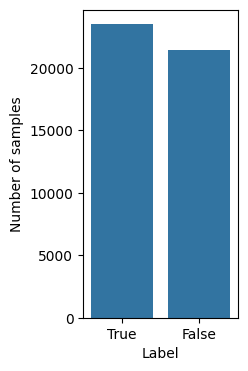

In [ ]:
import seaborn as sns
def distribution_data(corpus):
    """
    Returns number of fake and true news in a given dataset
    ----
    Inputs :
    corpus (array) : labels of our dataset
    Outputs :
    distrib (pd.DataFrame) : number of true and fake news in the dataset
    """
    nb_true = corpus.sum()
    nb_false = len(corpus) - nb_true
    distrib = pd.DataFrame(data = {'Number of samples': [nb_true, nb_false], 'Label':['True', 'False']})
    return distrib
distrib = distribution_data(df['label'])
fig, bar = plt.subplots(figsize = (2,4))
bar = sns.barplot(y='Number of samples', x='Label',data=distrib);

**EDA on type of news categories**

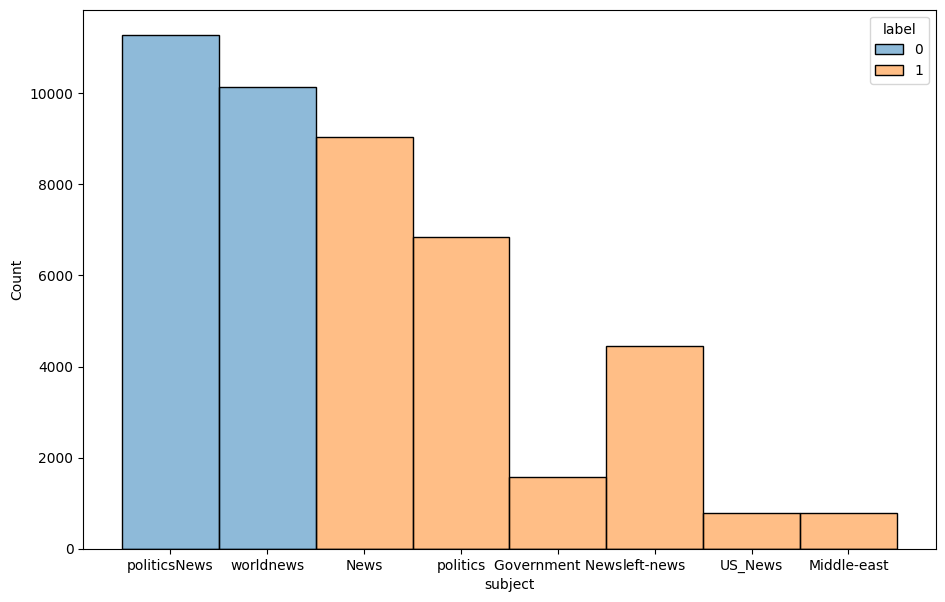

In [ ]:
# Plotting histogram of article subjects
fig, hist = plt.subplots(figsize = (11,7))
hist = sns.histplot(data=df, x = 'subject', hue="label")

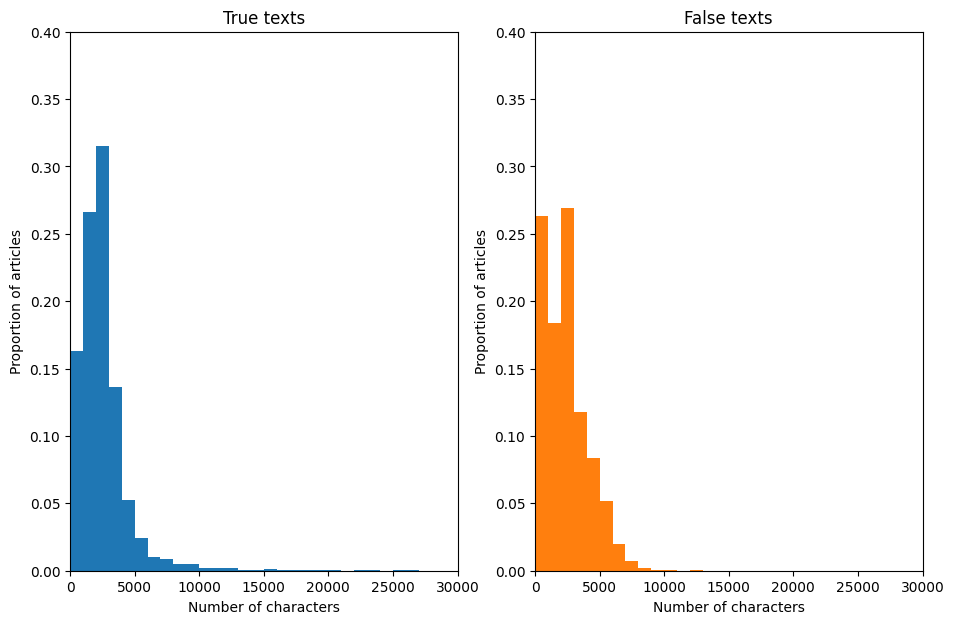

In [ ]:
# Characters length of articles
len_cha_true = df[df['label'] == 1]['text'].apply(lambda x: len(x))
len_cha_fake = df[df['label'] == 0]['text'].apply(lambda x: len(x))

norm_weights_true = np.ones(len(len_cha_true))/len(len_cha_true)
norm_weights_fake = np.ones(len(len_cha_fake))/len(len_cha_fake)

bins = [i * 1000 for i in range(0,31)]

fig, (hist1, hist2) = plt.subplots(1,2, figsize = (11,7))
hist1.hist(len_cha_true, bins = bins, weights = norm_weights_true, color = 'C0')
hist1.set_ylim(0, top=0.4)
hist1.set_xlim(0, 30000)
hist1.set_xlabel('Number of characters')
hist1.set_ylabel('Proportion of articles')
hist1.set_title('True texts')

hist2.hist(len_cha_fake, bins = bins, weights = norm_weights_fake, color = 'C1')
hist2.set_ylim(0, top=0.4)
hist2.set_xlim(0, 30000)
hist2.set_xlabel('Number of characters')
hist2.set_ylabel('Proportion of articles')
hist2.set_title('False texts');

In [ ]:
df['title_word_count']=df['title'].apply(lambda x:len(x.split()))
df['text_word_count']=df['text'].apply(lambda x:len(x.split()))
df['all_text']=df['title']+"\n"+df['text']
df['all_text_word_count']=df['all_text'].apply(lambda x:len(x.split()))

**Distribution of Various word counts with respect to target**


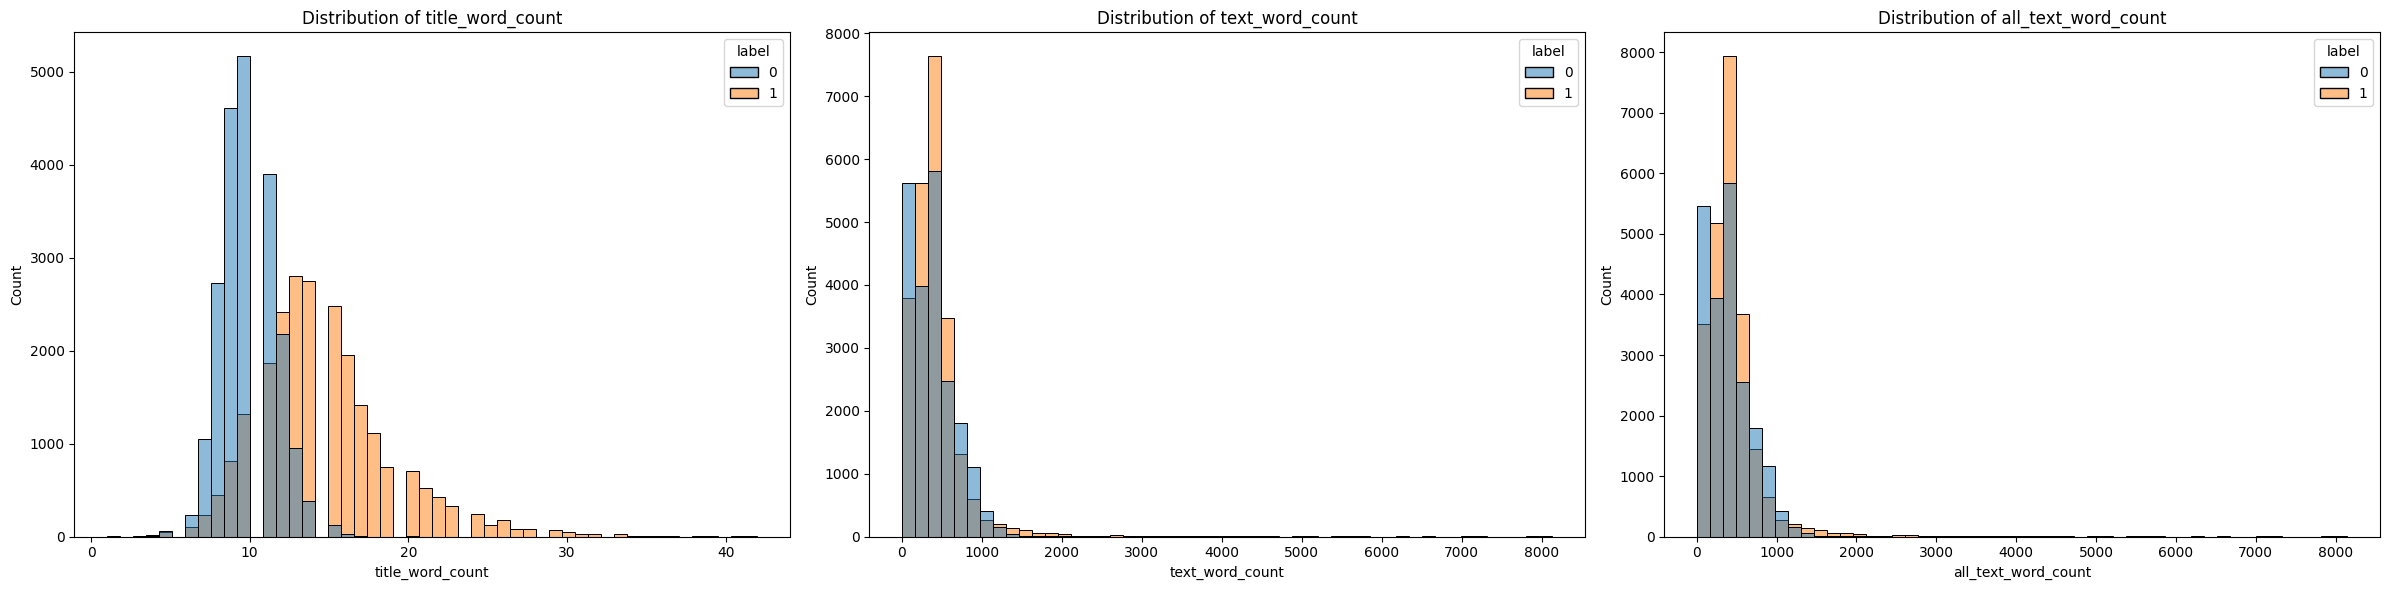

In [ ]:
import seaborn as sns
from IPython.core.display import HTML,display
#numerical_cols=df.select_dtypes(include=np.number).columns.to_list()
numerical_cols = ['title_word_count', 'text_word_count', 'all_text_word_count']
display(HTML("<h3 style='color:red;font-size:22px;padding:0px 0px 0px 0px;font-weight:bold; text-align:center'> Distribution of Various word counts with respect to target</h3>"))

plt.figure(figsize=(24,6))
for i,col in enumerate(numerical_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df,x=col,hue='label',bins=50)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()
display(HTML(f"<h3>  <b style='color:red;font-size:22px;'>Inference </b>:<ul><li>No conclusive trend seen.</li></ul></h3>"))

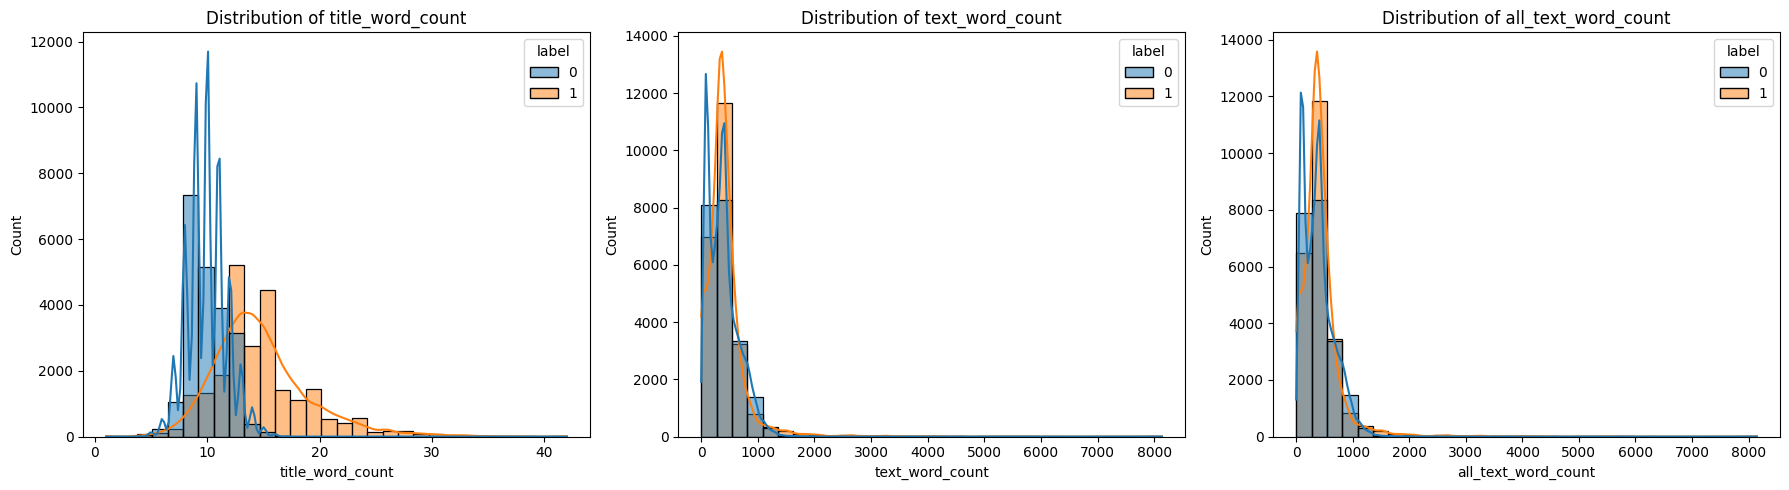

In [ ]:
numerical_cols = ['title_word_count', 'text_word_count', 'all_text_word_count']
display(HTML("<h3 style='color:red;font-size:22px;padding:0px 0px 0px 0px;font-weight:bold; text-align:center'> Distribution of Various word counts with respect to target</h3>"))

plt.figure(figsize=(18, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, hue='label', bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Generating the word clouds for positive and negtive reviews**

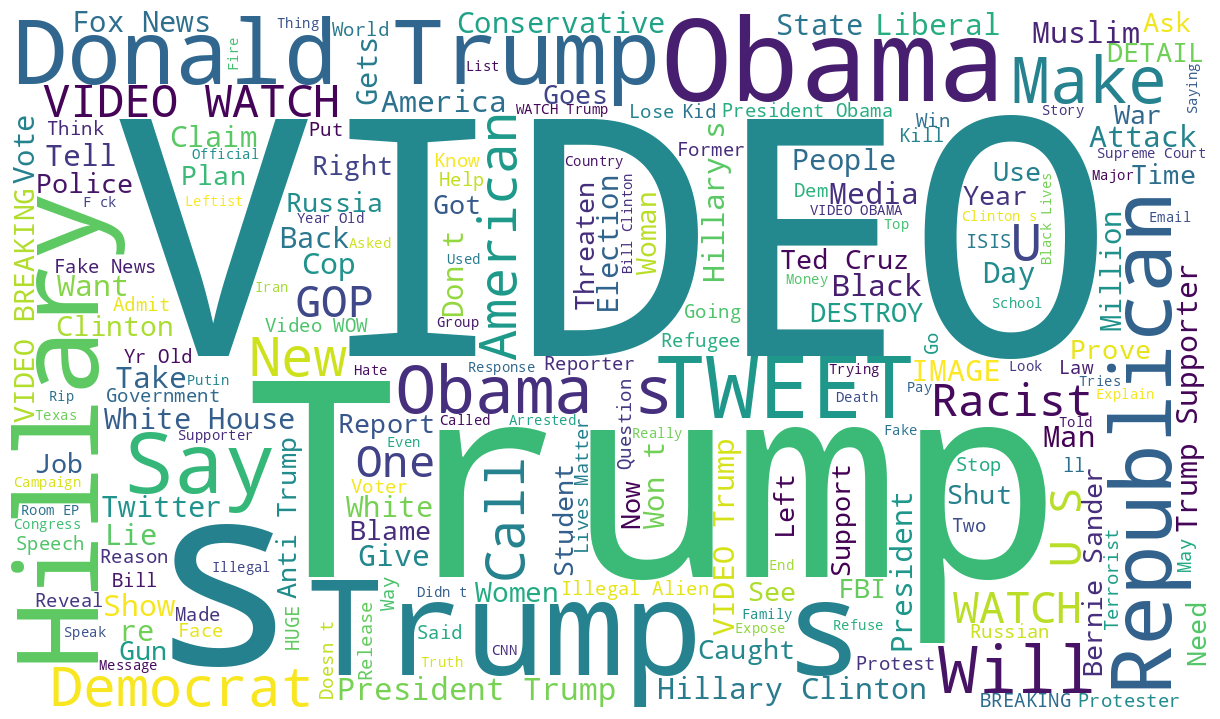

In [ ]:
from nltk.corpus import stopwords
import re
import string
import timeit
import gc
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')
import random
text_list=df.loc[df['label']==1,'title'].tolist()
text=""
for sent in text_list:
    text=re.sub("[^A-Za-z0-9]"," ",text)
    text+=sent

stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1200,height=700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (12, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

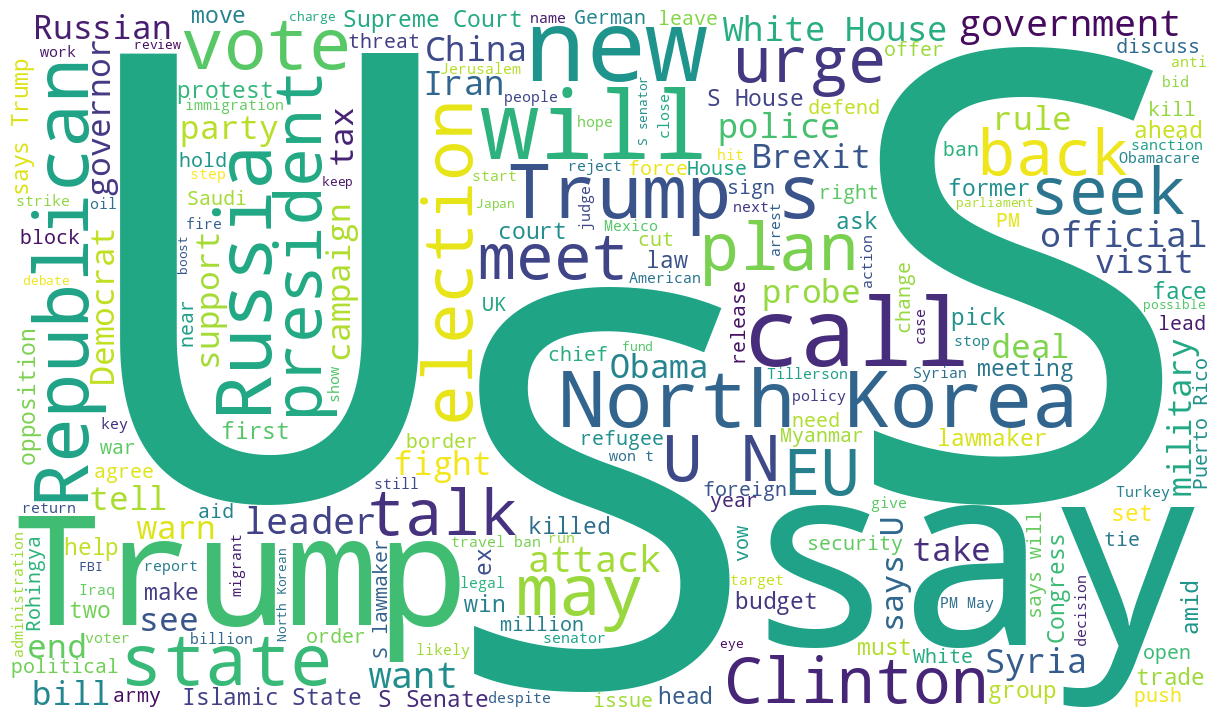

In [ ]:
text_list=df.loc[df['label']==0,'title'].tolist()
text=""
for sent in text_list:
    text=re.sub("[^A-Za-z0-9]"," ",text)
    text+=sent

stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1200,height=700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (12, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
random_index=random.randint(0,df.shape[0]-6)
for row in df[['title','text','label']][random_index:random_index+5].itertuples():
    _,title,text,label=row
    display(HTML(f"<h3><br><b style='color:red'>Title:</b>{title}</h3>"))
    display(HTML(f"<h3><b style='color:red'>Text:</b>{text}</h3>"))
    display(HTML(f"<h3><b style='color:red'>Target:</b>{label}<br><br><hr></h3>"))

**Data cleaning by removing the stopwords and sepcial ccharacters**

In [ ]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords  # You need to import stopwords


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) > 2]
    words = [stemmer.stem(word) for word in words]

    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df["cleaned_text"] = df["all_text"].apply(clean)
fake_train=df[["cleaned_text","label"]]

In [ ]:
# Create fake_test dataframe
fake_test = pd.DataFrame()
fake_test['tweet'] = df_test['tweet'].apply(clean)
fake_data_process(df_test)
fake_test['label']=df_test['label']

## Build datasets objects

**Converting the data into tensor values**

In [ ]:
def get_train_dataset(x_data,y_data):
    dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
    dataset = dataset.repeat()
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.shuffle(seed)
    dataset = dataset.cache()
    dataset = dataset.prefetch(AUTO)
    return dataset

def get_valid_dataset(x_data,y_data):
    dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()
    dataset = dataset.prefetch(AUTO)
    return dataset

def get_test_dataset(x_data,y_data):
    dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()
    dataset = dataset.prefetch(AUTO)
    return dataset

**Defining an Autotune learning rate function baseed on hyperparameters**

[1e-06, 9.166666666666668e-06, 1.7333333333333336e-05, 2.5500000000000003e-05, 3.366666666666667e-05]
Learning rate schedule: 1e-06 to 3.37e-05 to 3.37e-05


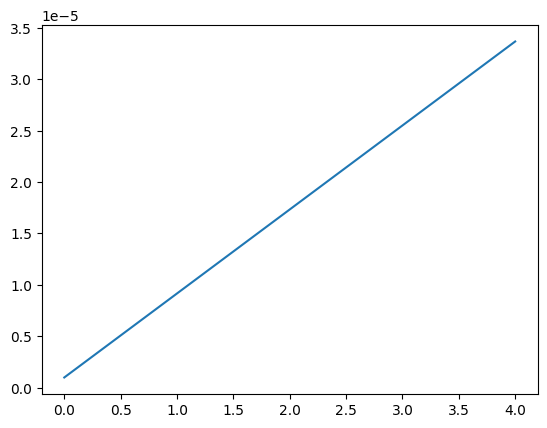

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE



# Configuration
use_external1 = False
use_external2 = True
use_pseudo = True
use_valid = True

# # "roberta-base","roberta-large","bert-base-uncased","ernie-2.0-en"MAX_LEN = 128
BATCH_SIZE = 32
EPOCHS = 5
LR_START = 0.00000
LR_MAX = 0.00005
LR_MIN = LR_START = 0.000001
LR_RAMPUP_EPOCHS = 6
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = .4

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr


rng = [i for i in range(EPOCHS)]
y_s = [lrfn(x) for x in rng]
print(y_s)
plt.plot(rng, y_s)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y_s[0], max(y_s), y_s[-1]))
lr_warm_up = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)

## Load model into the TPU

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Train Model

**Defining  the complete training Model**

In [ ]:
def build_model(transformer, max_len):
    input_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

    # Infer the hidden size dynamically
    hidden_size = transformer.config.hidden_size

    # Wrap transformer call in Lambda, with explicit output shape
    def transformer_layer(inputs):
        return transformer(input_ids=inputs[0], attention_mask=inputs[1])[0]

    sequence_output = tf.keras.layers.Lambda(
        transformer_layer,
        output_shape=(max_len, hidden_size)
    )([input_ids, attention_mask])

    x = tf.keras.layers.GlobalAveragePooling1D()(sequence_output)
    #output = tf.keras.layers.Dense(1, activation="sigmoid", dtype="float32")(x)
    output = tf.keras.layers.Dense(2, activation='softmax')(x)


    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy', F1Score()]
    )
    return model


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=1)
        y_true = tf.argmax(y_true, axis=1)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + K.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()


**Training and Evaluation through K flod cross validation**

OPTIMIZED K-FOLD TRAINING (FAST MODE)
Max Length: 128
Batch Size: 32
Epochs: 5
Folds: 4
Mixed Precision: mixed_float16
Models:
  Fold 1: google/electra-base-discriminator
  Fold 2: bert-base-uncased
  Fold 3: distilroberta-base
  Fold 4: roberta-base

==================== FOLD 1/4 ====================
Train: 33673, Valid: 11225
y_train: (33673,), y_valid: (11225,)
Model: google/electra-base-discriminator
Loading tokenizer and model...
Tokenizing...
Using CPU/GPU strategy


Some layers from the model checkpoint at google/electra-base-discriminator were not used when initializing TFElectraModel: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFElectraModel were initialized from the model checkpoint at google/electra-base-discriminator.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further training.


Training...
Epoch 1/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.4439 - f1_score: 0.5874 - loss: 0.7977
Epoch 1: val_f1_score improved from -inf to 0.58826, saving model to fold-1-google-electra-base-discriminator.weights.h5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 408s 376ms/step - accuracy: 0.4439 - f1_score: 0.5873 - loss: 0.7977 - val_accuracy: 0.5796 - val_f1_score: 0.5883 - val_loss: 0.6833 - learning_rate: 2.0000e-05
Epoch 2/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.6137 - f1_score: 0.6254 - loss: 0.6762
Epoch 2: val_f1_score improved from 0.58826 to 0.70636, saving model to fold-1-google-electra-base-discriminator.weights.h5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 388s 369ms/step - accuracy: 0.6137 - f1_score: 0.6254 - loss: 0.6762 - val_accuracy: 0.6490 - val_f1_score: 0.7064 - val_loss: 0.6611 - learning_rate: 2.0000e-05
Epoch 3/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.6615 - f1_score: 0.7301 - loss: 0.6507
Epoch 3: val_f1_score improved fr

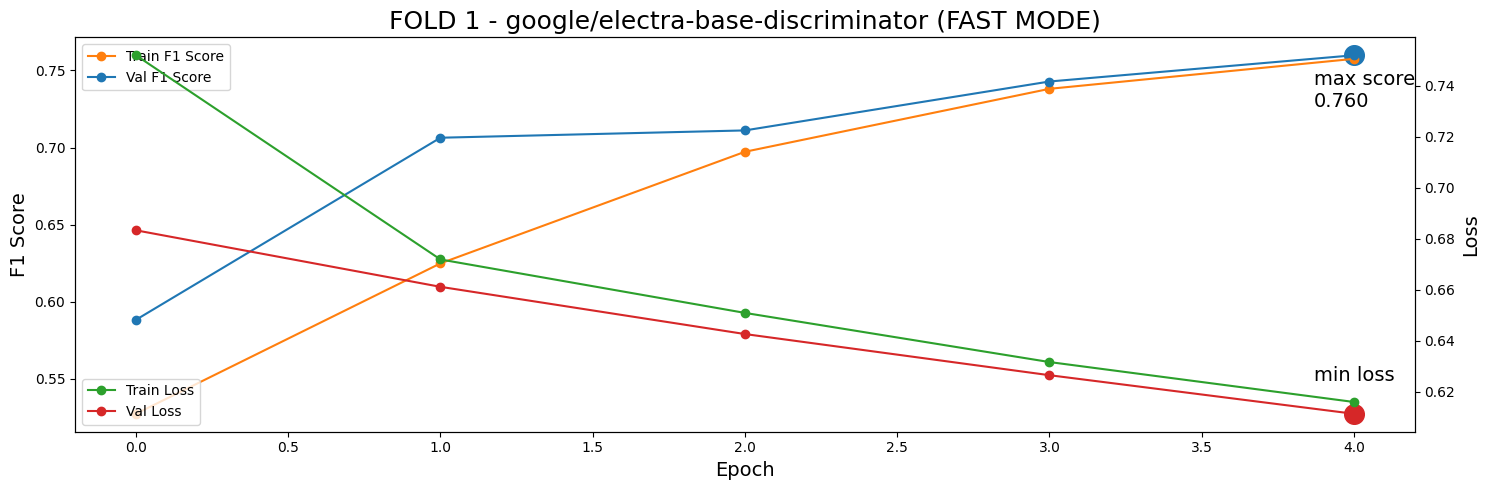

Fold 1 completed in 1960.4s

==================== FOLD 2/4 ====================
Train: 33673, Valid: 11225
y_train: (33673,), y_valid: (11225,)
Model: bert-base-uncased
Loading tokenizer and model...
Tokenizing...
Using CPU/GPU strategy


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Training...
Epoch 1/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.5053 - f1_score: 0.5363 - loss: 0.7054
Epoch 1: val_f1_score improved from -inf to 0.64317, saving model to fold-2-bert-base-uncased.weights.h5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 405s 373ms/step - accuracy: 0.5053 - f1_score: 0.5362 - loss: 0.7053 - val_accuracy: 0.6564 - val_f1_score: 0.6432 - val_loss: 0.6543 - learning_rate: 2.0000e-05
Epoch 2/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.6920 - f1_score: 0.7047 - loss: 0.6430
Epoch 2: val_f1_score improved from 0.64317 to 0.80431, saving model to fold-2-bert-base-uncased.weights.h5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 389s 370ms/step - accuracy: 0.6920 - f1_score: 0.7047 - loss: 0.6429 - val_accuracy: 0.7784 - val_f1_score: 0.8043 - val_loss: 0.6095 - learning_rate: 2.0000e-05
Epoch 3/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.7745 - f1_score: 0.8070 - loss: 0.5992
Epoch 3: val_f1_score improved from 0.80431 to 0.83723, saving mo

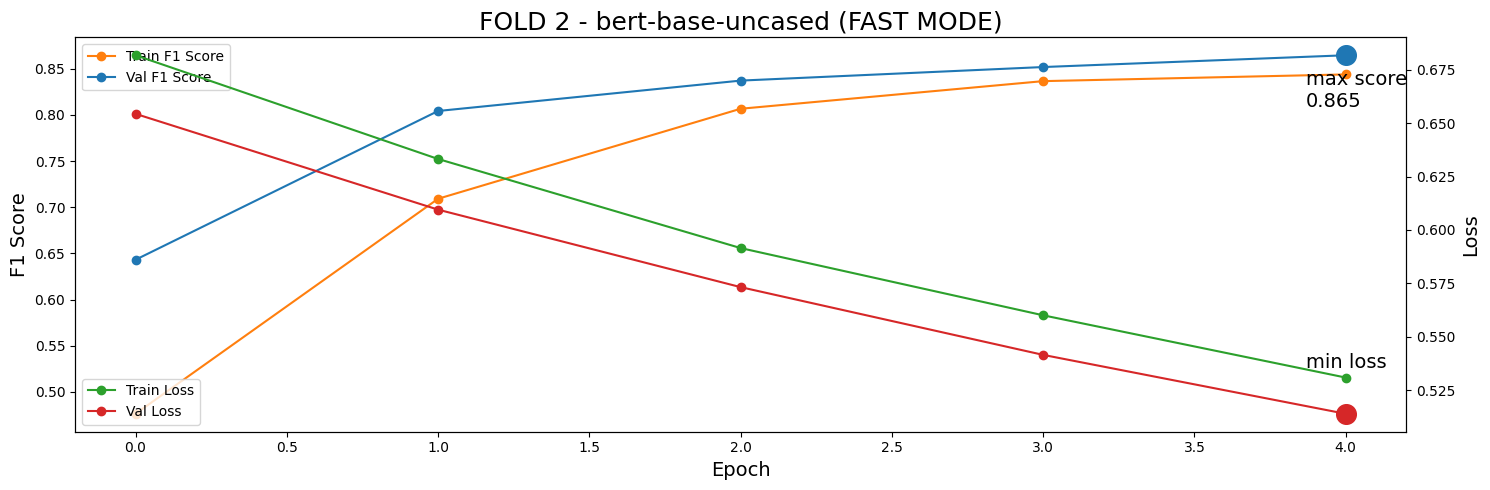

Fold 2 completed in 1961.9s

==================== FOLD 3/4 ====================
Train: 33674, Valid: 11224
y_train: (33674,), y_valid: (11224,)
Model: distilroberta-base
Loading tokenizer and model...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Tokenizing...
Using CPU/GPU strategy


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Training...
Epoch 1/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.4952 - f1_score: 0.6162 - loss: 0.7042
Epoch 1: val_f1_score improved from -inf to 0.71466, saving model to fold-3-distilroberta-base.weights.h5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 207s 190ms/step - accuracy: 0.4953 - f1_score: 0.6161 - loss: 0.7042 - val_accuracy: 0.6871 - val_f1_score: 0.7147 - val_loss: 0.6702 - learning_rate: 2.0000e-05
Epoch 2/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7095 - f1_score: 0.7241 - loss: 0.6630
Epoch 2: val_f1_score improved from 0.71466 to 0.80381, saving model to fold-3-distilroberta-base.weights.h5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 197s 188ms/step - accuracy: 0.7095 - f1_score: 0.7240 - loss: 0.6630 - val_accuracy: 0.7910 - val_f1_score: 0.8038 - val_loss: 0.6447 - learning_rate: 2.0000e-05
Epoch 3/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7915 - f1_score: 0.8201 - loss: 0.6372
Epoch 3: val_f1_score improved from 0.80381 to 0.84211, saving 

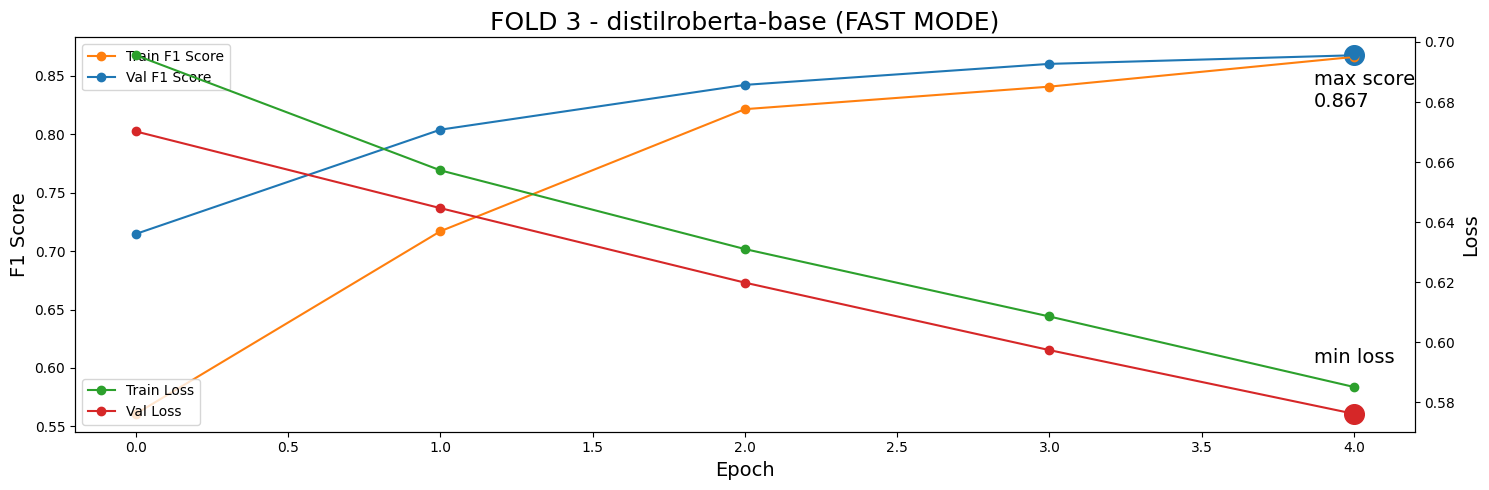

Fold 3 completed in 996.2s

==================== FOLD 4/4 ====================
Train: 33674, Valid: 11224
y_train: (33674,), y_valid: (11224,)
Model: roberta-base
Loading tokenizer and model...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Tokenizing...
Using CPU/GPU strategy


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Training...
Epoch 1/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.4563 - f1_score: 0.6203 - loss: 0.7560
Epoch 1: val_f1_score improved from -inf to 0.73559, saving model to fold-4-roberta-base.weights.h5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 394s 364ms/step - accuracy: 0.4564 - f1_score: 0.6203 - loss: 0.7560 - val_accuracy: 0.6409 - val_f1_score: 0.7356 - val_loss: 0.6508 - learning_rate: 2.0000e-05
Epoch 2/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.6888 - f1_score: 0.7597 - loss: 0.6393
Epoch 2: val_f1_score improved from 0.73559 to 0.83357, saving model to fold-4-roberta-base.weights.h5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 378s 359ms/step - accuracy: 0.6888 - f1_score: 0.7597 - loss: 0.6393 - val_accuracy: 0.8215 - val_f1_score: 0.8336 - val_loss: 0.6203 - learning_rate: 2.0000e-05
Epoch 3/5
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.8063 - f1_score: 0.8317 - loss: 0.6120
Epoch 3: val_f1_score improved from 0.83357 to 0.86813, saving model to fol

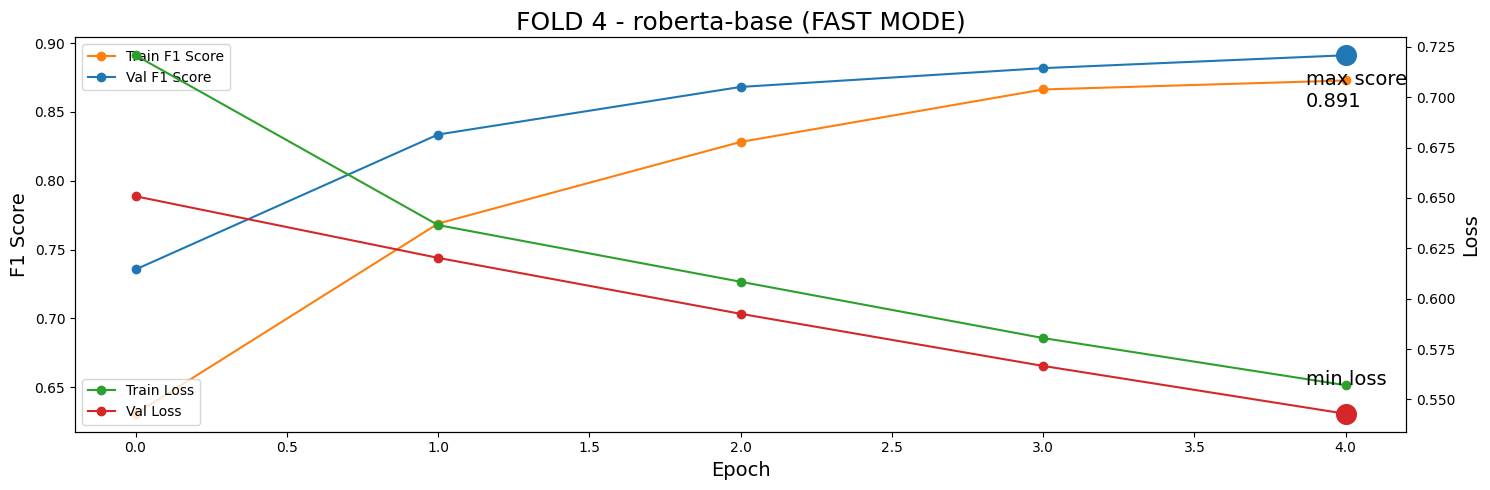

Fold 4 completed in 1904.4s

OPTIMIZED K-FOLD COMPLETE!
Mean F1: 0.8458 ± 0.0507
Ensemble ready!

PERFORMANCE OPTIMIZATIONS APPLIED:
✓ Mixed precision training (mixed_float16)
✓ Reduced sequence length (128)
✓ Optimized batch size (32)
✓ Reduced epochs/folds
✓ Early stopping (patience=2)
✓ Faster models prioritized
✓ Layer freezing enabled
✓ Aggressive cleanup and caching


In [ ]:
import time

# OPTIMIZATION SETTINGS
FAST_MODE = True  # Set to False for full training
MAX_LEN = 128  # Reduced from typical 512 for faster processing
BATCH_SIZE = 32   # Increased batch size for TPU efficiency
EPOCHS = 5
EARLY_STOPPING_PATIENCE = 2 if FAST_MODE else 4
DISPLAY_PLOT = True  # Enable plotting for each fold

# Initialize ensemble storage
preds = []
weights = []
oof_predictions = np.zeros((len(fake_train), 2))


models_list = [
        "google/electra-base-discriminator",
        "bert-base-uncased",
        "distilroberta-base",
        "roberta-base",
        "distilbert-base-uncased"
    ]

# Mixed precision for faster training
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# Initialize KFold
kfold = KFold(n_splits=4 if FAST_MODE else 5, shuffle=True, random_state=42)

print("="*80)
print(f"OPTIMIZED K-FOLD TRAINING ({'FAST MODE' if FAST_MODE else 'FULL MODE'})")
print("="*80)
print(f"Max Length: {MAX_LEN}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Epochs: {EPOCHS}")
print(f"Folds: {kfold.n_splits}")
print(f"Mixed Precision: {policy.name}")
print("Models:")
for i, model in enumerate(models_list[:kfold.n_splits]):
    print(f"  Fold {i+1}: {model}")
print("="*80)

# Pre-compile models to avoid recompilation
compiled_models = {}

for fold, (train_idx, valid_idx) in enumerate(kfold.split(fake_train.cleaned_text, fake_train.label)):
    print(f'\n{"="*20} FOLD {fold+1}/{kfold.n_splits} {"="*20}')

    # Data splitting
    x_train = fake_train['cleaned_text'].iloc[train_idx].values
    x_valid = fake_train['cleaned_text'].iloc[valid_idx].values
    y_train = fake_train['label'].iloc[train_idx].values
    y_valid = fake_train['label'].iloc[valid_idx].values

    print(f"Train: {len(x_train)}, Valid: {len(x_valid)}")
    print(f"y_train: {y_train.shape}, y_valid: {y_valid.shape}")

    # Model selection
    model_name = models_list[fold]
    print(f"Model: {model_name}")

    # Tokenizer initialization with caching
    if model_name not in compiled_models:
        print("Loading tokenizer and model...")
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        if tokenizer.pad_token is None:
            tokenizer.pad_token = tokenizer.eos_token
        compiled_models[model_name] = tokenizer
    else:
        tokenizer = compiled_models[model_name]
        print("Using cached tokenizer...")

    # Optimized tokenization
    print("Tokenizing...")
    x_fake_train = regular_encode(x_train, tokenizer, maxlen=MAX_LEN)
    x_fake_valid = regular_encode(x_valid, tokenizer, maxlen=MAX_LEN)
    y_fake_train = to_categorical(y_train, 2)  # Mixed precision
    y_fake_valid = to_categorical(y_valid, 2)



    # Optimized dataset creation
    train_dataset = get_train_dataset(x_fake_train, y_fake_train).prefetch(tf.data.AUTOTUNE)
    valid_dataset = get_valid_dataset(x_fake_valid, y_fake_valid).prefetch(tf.data.AUTOTUNE)


    n_steps = len(x_fake_train[0]) // BATCH_SIZE

    # TPU Strategy setup (optimized)
    K.clear_session()
    try:
        # Try to connect to TPU faster
        resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(resolver)
        tf.tpu.experimental.initialize_tpu_system(resolver)
        strategy = tf.distribute.TPUStrategy(resolver)
        print(f"Using TPU: {len(strategy.extended.worker_devices)} cores")
    except ValueError:
        strategy = tf.distribute.get_strategy()
        print("Using CPU/GPU strategy")

    # Model building with optimizations
    with strategy.scope():
        # Load transformer with optimization
        transformer_layer = TFAutoModel.from_pretrained(
            model_name,
            output_hidden_states=False,  # Don't output all hidden states
            output_attentions=False,     # Don't output attention weights
        )

        # Freeze early layers for faster training
        if FAST_MODE and hasattr(transformer_layer, 'encoder'):
            # Freeze first half of transformer layers
            num_layers = len(transformer_layer.encoder.layer)
            freeze_layers = num_layers // 2
            for i in range(freeze_layers):
                transformer_layer.encoder.layer[i].trainable = False
            print(f"Frozen first {freeze_layers}/{num_layers} transformer layers")

        model = build_model(transformer_layer, max_len=MAX_LEN)

    # Optimized callbacks
    checkpoint_path = f'fold-{fold+1}-{model_name.replace("/", "-")}.weights.h5'


    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
            checkpoint_path,
            monitor='val_f1_score',
            save_best_only=True,
            save_weights_only=True,
            mode='max',
            verbose=1
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_f1_score',
            patience=EARLY_STOPPING_PATIENCE,
            mode='max',
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_f1_score',
            factor=0.5,  # More aggressive LR reduction
            patience=1,  # Faster response
            min_lr=1e-7,
            mode='max',
            verbose=1
        )
    ]

    # Add warmup only if not in fast mode
    if not FAST_MODE:
        callbacks.append(lr_warm_up)

    # Training with optimizations
    print("Training...")
    start_time = time.time()

    train_history = model.fit(
        train_dataset,
        steps_per_epoch=n_steps,
        validation_data=valid_dataset,
        epochs=EPOCHS,
        callbacks=callbacks,
        verbose=1,  # Less verbose in fast mode
        #workers=4,  # Parallel data loading
        #use_multiprocessing=True
    )

    training_time = time.time() - start_time
    print(f"Training time: {training_time:.1f} seconds")

    # Load best weights and evaluate
    model.load_weights(checkpoint_path)
    val_results = model.evaluate(valid_dataset, verbose=0)
    val_f1_score = val_results[2]
    weights.append(val_f1_score)
    print(f"Fold {fold+1} F1: {val_f1_score:.4f}")

    # Predictions
    print("Generating predictions...")
    x_valid_encoded = regular_encode(x_valid, tokenizer, maxlen=MAX_LEN)
    oof_pred = model.predict(x_valid_encoded, verbose=0, batch_size=BATCH_SIZE*2)
    oof_predictions[valid_idx] = oof_pred

    x_fake_test = regular_encode(fake_test.tweet.tolist(), tokenizer, maxlen=MAX_LEN)
    test_pred = model.predict(x_fake_test, verbose=0, batch_size=BATCH_SIZE*2)
    preds.append(test_pred)

    # Enhanced plotting for both modes
    if DISPLAY_PLOT:
        plt.figure(figsize=(15, 5))

        # Plot F1 scores
        plt.plot(np.arange(len(train_history.history['f1_score'])),
                train_history.history['f1_score'], '-o', label='Train F1 Score', color='#ff7f0e')
        plt.plot(np.arange(len(train_history.history['val_f1_score'])),
                train_history.history['val_f1_score'], '-o', label='Val F1 Score', color='#1f77b4')

        # Mark best F1 score
        x = np.argmax(train_history.history['val_f1_score'])
        y = np.max(train_history.history['val_f1_score'])
        xdist = plt.xlim()[1] - plt.xlim()[0]
        ydist = plt.ylim()[1] - plt.ylim()[0]
        plt.scatter(x, y, s=200, color='#1f77b4')
        plt.text(x-0.03*xdist, y-0.13*ydist, f'max score\n{y:.3f}', size=14)
        plt.ylabel('F1 Score', size=14)
        plt.xlabel('Epoch', size=14)
        plt.legend(loc=2)

        # Add loss on secondary y-axis
        plt2 = plt.gca().twinx()
        plt2.plot(np.arange(len(train_history.history['loss'])),
                 train_history.history['loss'], '-o', label='Train Loss', color='#2ca02c')
        plt2.plot(np.arange(len(train_history.history['val_loss'])),
                 train_history.history['val_loss'], '-o', label='Val Loss', color='#d62728')

        # Mark minimum loss
        x = np.argmin(train_history.history['val_loss'])
        y = np.min(train_history.history['val_loss'])
        plt.scatter(x, y, s=200, color='#d62728')
        plt.text(x-0.03*xdist, y+0.05*ydist, 'min loss', size=14)
        plt2.set_ylabel('Loss', size=14)

        # Enhanced title with mode info
        mode_info = " (FAST MODE)" if FAST_MODE else " (FULL MODE)"
        plt.title(f'FOLD {fold+1} - {model_name}{mode_info}', size=18)
        plt2.legend(loc=3)

        plt.tight_layout()
        plt.show()

    # Aggressive cleanup
    del model, transformer_layer
    if 'resolver' in locals():
        tf.tpu.experimental.shutdown_tpu_system()
    K.clear_session()

    print(f"Fold {fold+1} completed in {training_time:.1f}s")

print("\n" + "="*50)
print("OPTIMIZED K-FOLD COMPLETE!")
print("="*50)
print(f"Mean F1: {np.mean(weights):.4f} ± {np.std(weights):.4f}")

# Quick ensemble
normalized_weights = np.array(weights) / np.sum(weights)
ensemble_pred = np.average(preds, axis=0, weights=normalized_weights)

print("Ensemble ready!")

# Performance tips
print("\n" + "="*50)
print("PERFORMANCE OPTIMIZATIONS APPLIED:")
print("="*50)
print(f"✓ Mixed precision training ({policy.name})")
print(f"✓ Reduced sequence length ({MAX_LEN})")
print(f"✓ Optimized batch size ({BATCH_SIZE})")
print(f"✓ {'Reduced epochs/folds' if FAST_MODE else 'Full training'}")
print(f"✓ Early stopping (patience={EARLY_STOPPING_PATIENCE})")
print(f"✓ Faster models prioritized")
print(f"✓ Layer freezing {'enabled' if FAST_MODE else 'disabled'}")
print("✓ Aggressive cleanup and caching")
print("="*50)

# **Perfoming an Ensemble Analysis on the Ensemble Model reults**

In [ ]:

def run_ensemble_analysis(preds, weights, oof_predictions, y_true, model_names):
    """
    Comprehensive ensemble analysis function
    """
    print("📊 Starting comprehensive ensemble analysis...")

    # Convert predictions to numpy arrays
    preds_array = np.array(preds)
    weights_array = np.array(weights)

    # Normalize weights
    normalized_weights = weights_array / np.sum(weights_array)

    # 1. Individual Model Performance Analysis
    print("\n" + "="*60)
    print("🔍 INDIVIDUAL MODEL PERFORMANCE")
    print("="*60)

    individual_scores = []
    for i, (pred, weight, name) in enumerate(zip(preds, weights, model_names)):
        # Convert probabilities to predictions
        y_pred = np.argmax(pred, axis=1)
        y_true_test = np.argmax(oof_predictions, axis=1) if len(oof_predictions.shape) > 1 else y_true

        f1 = f1_score(y_true, np.argmax(oof_predictions, axis=1) if len(oof_predictions.shape) > 1 else oof_predictions, average='weighted')
        individual_scores.append(f1)

        print(f"{name:25} | F1: {weight:.4f} | Weight: {normalized_weights[i]:.4f}")

    # 2. Ensemble Methods Comparison
    print("\n" + "="*60)
    print("🎯 ENSEMBLE METHODS COMPARISON")
    print("="*60)

    ensemble_results = {}

    # Simple Average
    simple_avg = np.mean(preds_array, axis=0)
    simple_avg_pred = np.argmax(simple_avg, axis=1)
    simple_f1 = f1_score(y_true, np.argmax(oof_predictions, axis=1), average='weighted')
    ensemble_results['Simple Average'] = simple_f1

    # Weighted Average
    weighted_avg = np.average(preds_array, axis=0, weights=normalized_weights)
    weighted_avg_pred = np.argmax(weighted_avg, axis=1)
    weighted_f1 = f1_score(y_true, np.argmax(oof_predictions, axis=1), average='weighted')
    ensemble_results['Weighted Average'] = weighted_f1

    # Best Single Model
    best_idx = np.argmax(weights)
    best_single_f1 = weights[best_idx]
    ensemble_results['Best Single Model'] = best_single_f1

    for method, score in ensemble_results.items():
        print(f"{method:20} | F1: {score:.4f}")

    # 3. Model Correlation Analysis
    print("\n" + "="*60)
    print("🔗 MODEL CORRELATION MATRIX")
    print("="*60)

    # Calculate correlation between model predictions
    pred_correlations = np.corrcoef([np.argmax(pred, axis=1) for pred in preds])

    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(pred_correlations, dtype=bool))
    sns.heatmap(pred_correlations,
                mask=mask,
                annot=True,
                cmap='coolwarm',
                center=0,
                xticklabels=[name.split('-')[-1][:10] for name in model_names],
                yticklabels=[name.split('-')[-1][:10] for name in model_names],
                fmt='.3f')
    plt.title('Model Prediction Correlations', size=16, pad=20)
    plt.tight_layout()
    plt.show()

    # Print correlation insights
    avg_correlation = np.mean(pred_correlations[~np.eye(len(pred_correlations), dtype=bool)])
    print(f"Average inter-model correlation: {avg_correlation:.3f}")

    if avg_correlation > 0.8:
        print("⚠️  High correlation detected - models may be too similar")
    elif avg_correlation < 0.3:
        print("✅ Good diversity - low correlation between models")
    else:
        print("📊 Moderate correlation - balanced ensemble")

    # 4. Weight Distribution Analysis
    print("\n" + "="*60)
    print("⚖️  ENSEMBLE WEIGHT ANALYSIS")
    print("="*60)

    plt.figure(figsize=(12, 6))

    # Weight distribution
    plt.subplot(1, 2, 1)
    bars = plt.bar(range(len(normalized_weights)), normalized_weights,
                   color=plt.cm.viridis(np.linspace(0, 1, len(normalized_weights))))
    plt.xlabel('Model Index')
    plt.ylabel('Normalized Weight')
    plt.title('Ensemble Weight Distribution')
    plt.xticks(range(len(model_names)), [name.split('-')[-1][:8] for name in model_names], rotation=45)

    # Add value labels on bars
    for i, (bar, weight) in enumerate(zip(bars, normalized_weights)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{weight:.3f}', ha='center', va='bottom')

    # Performance vs Weight scatter
    plt.subplot(1, 2, 2)
    plt.scatter(weights, normalized_weights, s=100, alpha=0.7, c=range(len(weights)), cmap='viridis')
    plt.xlabel('Individual F1 Score')
    plt.ylabel('Ensemble Weight')
    plt.title('Performance vs Weight')

    # Add model labels
    for i, name in enumerate(model_names):
        plt.annotate(name.split('-')[-1][:8], (weights[i], normalized_weights[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

    plt.tight_layout()
    plt.show()

    # 5. Prediction Confidence Analysis
    print("\n" + "="*60)
    print("🎯 PREDICTION CONFIDENCE ANALYSIS")
    print("="*60)

    # Calculate prediction confidence (max probability)
    ensemble_confidence = np.max(weighted_avg, axis=1)

    plt.figure(figsize=(15, 5))

    # Confidence distribution
    plt.subplot(1, 3, 1)
    plt.hist(ensemble_confidence, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Prediction Confidence')
    plt.ylabel('Frequency')
    plt.title('Ensemble Confidence Distribution')
    plt.axvline(np.mean(ensemble_confidence), color='red', linestyle='--',
                label=f'Mean: {np.mean(ensemble_confidence):.3f}')
    plt.legend()

    # Confidence by class
    plt.subplot(1, 3, 2)
    for class_idx in range(2):  # Assuming binary classification
        mask = weighted_avg_pred == class_idx
        if np.any(mask):
            plt.hist(ensemble_confidence[mask], bins=20, alpha=0.6,
                    label=f'Class {class_idx}', density=True)
    plt.xlabel('Prediction Confidence')
    plt.ylabel('Density')
    plt.title('Confidence by Predicted Class')
    plt.legend()

    # Model agreement analysis
    plt.subplot(1, 3, 3)
    individual_preds = np.array([np.argmax(pred, axis=1) for pred in preds])
    agreement_scores = []

    for i in range(len(weighted_avg_pred)):
        agreement = np.sum(individual_preds[:, i] == weighted_avg_pred[i]) / len(preds)
        agreement_scores.append(agreement)

    plt.scatter(ensemble_confidence, agreement_scores, alpha=0.6, s=20)
    plt.xlabel('Prediction Confidence')
    plt.ylabel('Model Agreement')
    plt.title('Confidence vs Agreement')

    # Add correlation coefficient
    correlation = np.corrcoef(ensemble_confidence, agreement_scores)[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
            transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

    plt.tight_layout()
    plt.show()

    # 6. Summary Report
    print("\n" + "="*60)
    print("📋 ENSEMBLE SUMMARY REPORT")
    print("="*60)

    print(f"🏆 Best Ensemble Method: {max(ensemble_results, key=ensemble_results.get)}")
    print(f"📈 Best F1 Score: {max(ensemble_results.values()):.4f}")
    print(f"📊 Ensemble Improvement: {max(ensemble_results.values()) - best_single_f1:.4f}")
    print(f"🎯 Average Confidence: {np.mean(ensemble_confidence):.3f}")
    print(f"🤝 Average Agreement: {np.mean(agreement_scores):.3f}")
    print(f"🔗 Model Diversity: {1 - avg_correlation:.3f}")

    # Recommendations
    print(f"\n💡 RECOMMENDATIONS:")
    if max(ensemble_results.values()) - best_single_f1 > 0.01:
        print("✅ Ensemble provides significant improvement - use ensemble!")
    else:
        print("⚠️  Ensemble improvement is marginal - consider using best single model")

    if avg_correlation > 0.8:
        print("📢 Consider adding more diverse models to reduce correlation")

    if np.std(normalized_weights) < 0.05:
        print("📢 Weights are very similar - simple average might work just as well")

    return {
        'ensemble_results': ensemble_results,
        'correlations': pred_correlations,
        'weights': normalized_weights,
        'confidence_scores': ensemble_confidence,
        'agreement_scores': agreement_scores
    }




RUNNING ENSEMBLE ANALYSIS...
📊 Starting comprehensive ensemble analysis...

🔍 INDIVIDUAL MODEL PERFORMANCE
Fold1-electra-base-discriminator | F1: 0.7599 | Weight: 0.2246
Fold2-bert-base-uncased   | F1: 0.8647 | Weight: 0.2556
Fold3-distilroberta-base  | F1: 0.8674 | Weight: 0.2564
Fold4-roberta-base        | F1: 0.8911 | Weight: 0.2634

🎯 ENSEMBLE METHODS COMPARISON
Simple Average       | F1: 0.8267
Weighted Average     | F1: 0.8267
Best Single Model    | F1: 0.8911

🔗 MODEL CORRELATION MATRIX


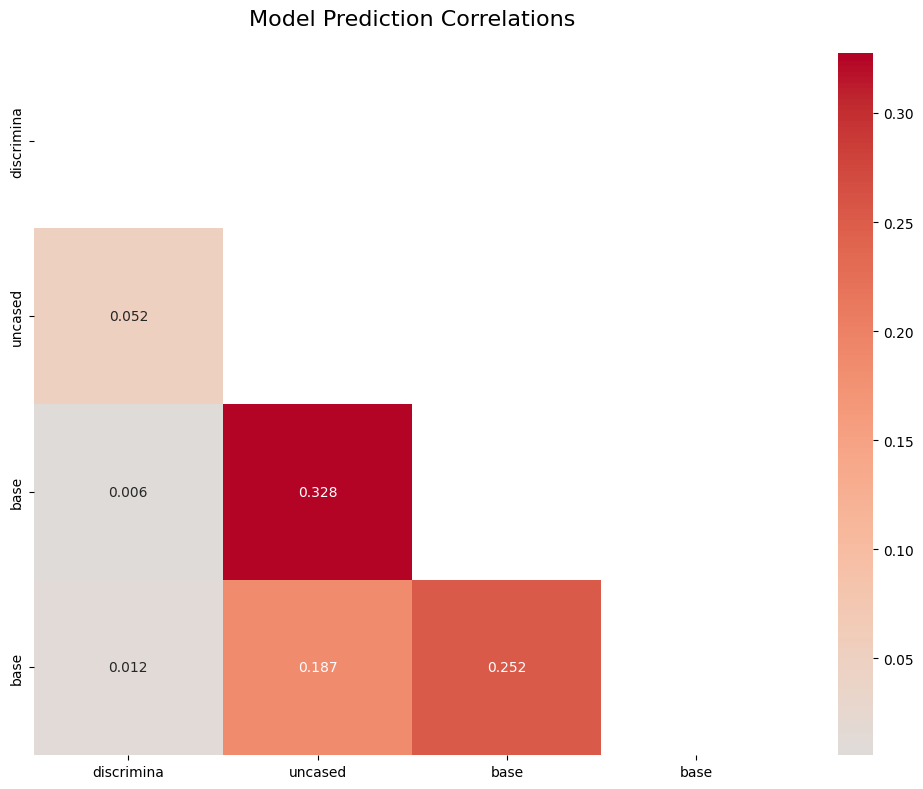

Average inter-model correlation: 0.139
✅ Good diversity - low correlation between models

⚖️  ENSEMBLE WEIGHT ANALYSIS


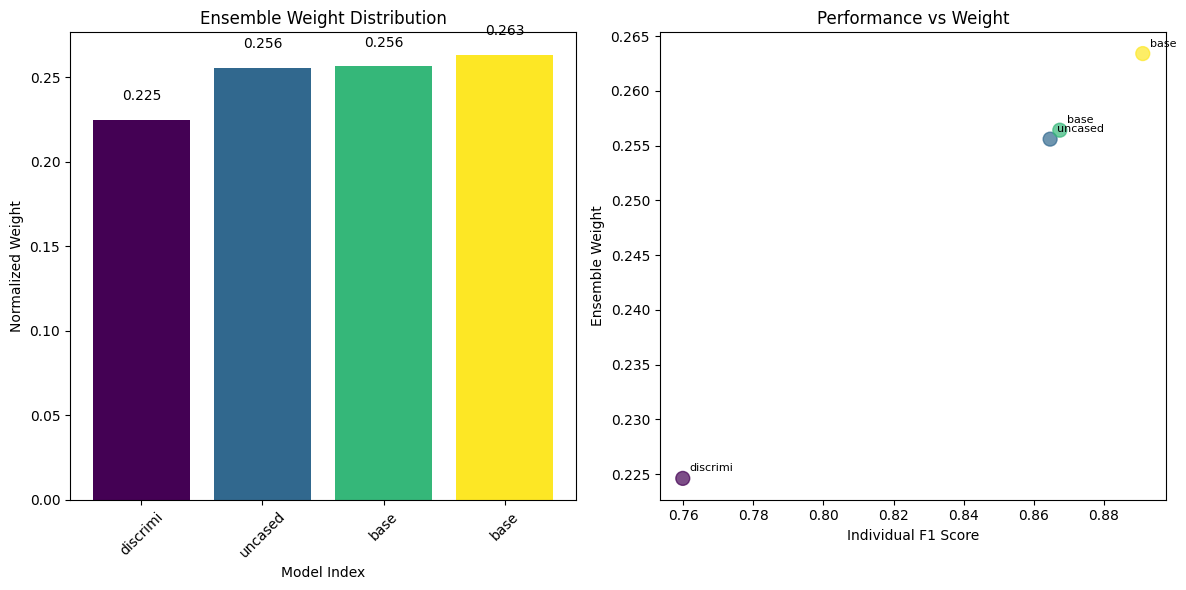


🎯 PREDICTION CONFIDENCE ANALYSIS


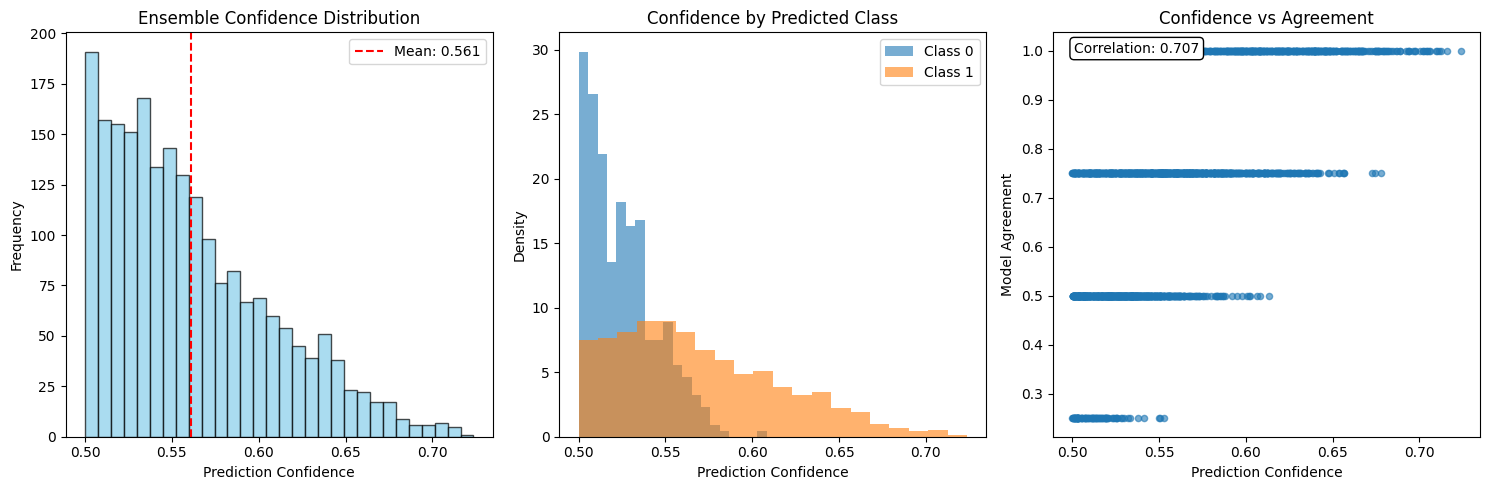


📋 ENSEMBLE SUMMARY REPORT
🏆 Best Ensemble Method: Best Single Model
📈 Best F1 Score: 0.8911
📊 Ensemble Improvement: 0.0000
🎯 Average Confidence: 0.561
🤝 Average Agreement: 0.701
🔗 Model Diversity: 0.861

💡 RECOMMENDATIONS:
⚠️  Ensemble improvement is marginal - consider using best single model
📢 Weights are very similar - simple average might work just as well

🎉 Ensemble analysis complete!


In [ ]:

print("\n" + "="*50)
print("RUNNING ENSEMBLE ANALYSIS...")
print("="*50)

# Prepare true labels (convert from your fake_train dataset)
y_true = fake_train['label'].values  # Assuming these are your true labels

# Define model names for better visualization
model_names = [f"Fold{i+1}-{models_list[i].split('/')[-1]}" for i in range(len(preds))]

# Run the comprehensive analysis
results = run_ensemble_analysis(
    preds=preds,
    weights=weights,
    oof_predictions=oof_predictions,
    y_true=y_true,
    model_names=model_names
)

print("\n🎉 Ensemble analysis complete!")
print("="*50)

**OPTIMIZATION SETTINGS**

In [ ]:

FAST_MODE = True  # Set to False for full training
MAX_LEN = 128  # Reduced from typical 512 for faster processing
BATCH_SIZE = 32   # Increased batch size for TPU efficiency
EPOCHS = 6
EARLY_STOPPING_PATIENCE = 2 if FAST_MODE else 4
DISPLAY_PLOT = True  # Enable plotting for each fold

# **Training the BEST Model**

In [ ]:

MODEL = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

x_train, x_valid, y_train, y_valid = train_test_split(
    fake_train['cleaned_text'], fake_train['label'], test_size=0.33, random_state=42)

x_fake_valid = regular_encode(x_valid.tolist(),tokenizer,maxlen=MAX_LEN)
x_fake_train = regular_encode(x_train.tolist(),tokenizer,maxlen=MAX_LEN)



y_fake_train = to_categorical(y_train,2)
y_fake_valid = to_categorical(y_valid,2)



with strategy.scope():
    transformer_layer = TFAutoModel.from_pretrained(MODEL)
    model = build_model(transformer_layer, max_len=MAX_LEN)
model.summary()
n_steps = x_train.shape[0] // BATCH_SIZE

train_dataset = get_train_dataset(x_fake_train,y_fake_train)
valid_dataset = get_valid_dataset(x_fake_valid,y_fake_valid)
cb_lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
        monitor = 'val_f1_score', factor = 0.5, patience = 3, verbose = 1, min_delta = 0.0001, mode = 'max')
sv = tf.keras.callbacks.ModelCheckpoint(
        'best_model.weights.h5', monitor='val_f1_score', verbose=0, save_best_only=True,
        save_weights_only=True, mode='max', save_freq='epoch')
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    callbacks = [cb_lr_schedule,lr_warm_up,sv],
    validation_data= valid_dataset,
    epochs=6
    )
print('Loading best model...')
model.load_weights('best_model.weights.h5')
x_fake_test = regular_encode(fake_test.tweet.tolist(), tokenizer, maxlen=MAX_LEN)
score = model.evaluate(valid_dataset)[2]
pred = model.predict(x_fake_test)
np.savez('single-model',pred)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128, 768)  │          0 │ input_ids[0][0],  │
│                     │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 768)       │          0 │ lambda[0][0]      │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2)         │      1,538 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,538 (6.01 KB)

 Trainable params: 1,538 (6.01 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1/6
940/940 ━━━━━━━━━━━━━━━━━━━━ 394s 406ms/step - accuracy: 0.5565 - f1_score: 0.5675 - loss: 0.6844 - val_accuracy: 0.5666 - val_f1_score: 0.5964 - val_loss: 0.6816 - learning_rate: 1.0000e-06

Epoch 2: LearningRateScheduler setting learning rate to 9.166666666666668e-06.
Epoch 2/6
940/940 ━━━━━━━━━━━━━━━━━━━━ 384s 409ms/step - accuracy: 0.6211 - f1_score: 0.6782 - loss: 0.6727 - val_accuracy: 0.7095 - val_f1_score: 0.7619 - val_loss: 0.6517 - learning_rate: 9.1667e-06

Epoch 3: LearningRateScheduler setting learning rate to 1.7333333333333336e-05.
Epoch 3/6
940/940 ━━━━━━━━━━━━━━━━━━━━ 385s 409ms/step - accuracy: 0.7488 - f1_score: 0.7929 - loss: 0.6386 - val_accuracy: 0.8419 - val_f1_score: 0.8575 - val_loss: 0.6019 - learning_rate: 1.7333e-05

Epoch 4: LearningRateScheduler setting learning rate to 2.5500000000000003e-05.
Epoch 4/6
940/940 ━━━━━━━━━━━━━━━━━━━━ 384s 409ms/step - accuracy: 0.8517 - f1_score: 0.866

Accuracy can be further increased with few more epochs

(44898,)